In [1]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df=pd.read_csv("/content/drive/MyDrive/Gold Price (2013-2023).csv")
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2583 non-null   object
 1   Price     2583 non-null   object
 2   Open      2583 non-null   object
 3   High      2583 non-null   object
 4   Low       2583 non-null   object
 5   Vol.      2578 non-null   object
 6   Change %  2583 non-null   object
dtypes: object(7)
memory usage: 141.4+ KB


In [4]:
df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,2583,2583,2583,2583,2583,2578,2583
unique,2583,2072,2061,2044,2019,1550,474
top,12/30/2022,"1,294.30","1,284.00","1,220.00","1,314.00",0.02K,0.00%
freq,1,5,5,6,5,48,29


In [5]:
df.isnull().sum()


,0
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,5
Change %,0


In [6]:


df.dropna(inplace=True)


In [7]:
df.isnull().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,0
Change %,0


In [8]:
df.duplicated().sum()

0

Index(['Price', 'Open', 'High', 'Low', 'Change %', 'Year', 'Month', 'Day'], dtype='object')


<Axes: >

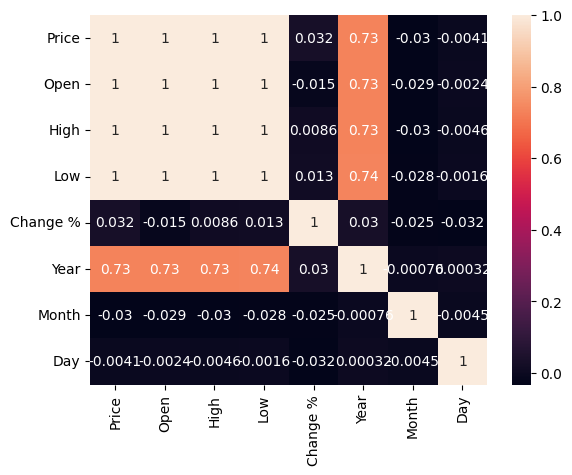

In [14]:
import pandas as pd
import seaborn as sns
import numpy as np

if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df = df.drop('Date', axis=1)

print(df.columns)
for col in ['Price', 'Open', 'High', 'Low', 'Volume', 'Change %']:
    if col in df.columns:
        if df[col].dtype == 'object':
            # Remove commas, 'K', and '%' symbols, then convert to numeric
            df[col] = df[col].str.replace(',', '', regex=False).str.replace('K', '', regex=False).str.replace('%', '', regex=False)
            # Convert to numeric, handling errors by setting invalid values to NaN
            df[col] = pd.to_numeric(df[col], errors='coerce')
            # Apply scaling for 'K' after converting to numeric
            if col == 'Volume': # Check if the column is 'Volume'
                # Replace 'K' with '000' before converting to numeric
                df[col] = df[col].astype(str).str.replace('K', '000', regex=False)
                # Convert all values in the column to numeric
                df[col] = pd.to_numeric(df[col], errors='coerce')


sns.heatmap(df.corr(), annot=True)

In [13]:
df.drop('Vol.', axis=1, inplace=True)

In [15]:
df.head()

,Price,Open,High,Low,Change %,Year,Month,Day
0,1826.2,1821.8,1832.4,1819.8,0.01,2022,12,30
1,1826.0,1812.3,1827.3,1811.2,0.56,2022,12,29
2,1815.8,1822.4,1822.8,1804.2,-0.40,2022,12,28
3,1823.1,1808.2,1841.9,1808.0,0.74,2022,12,27
5,1804.2,1801.0,1812.2,1798.9,0.50,2022,12,23


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Mean Squared Error: 17.29727376751702
R-squared: 0.9997459589134106


In [17]:
df['Price_Change'] = df['Price'].diff()
df['Price_Increase'] = (df['Price_Change'] > 0).astype(int)
df = df.drop(['Price', 'Price_Change'], axis=1)
X = df.drop('Price_Increase', axis=1)
y = df['Price_Increase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 0.501937984496124
Precision: 0.5
Recall: 0.36964980544747084
F1-Score: 0.4250559284116331


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:

X = df.drop('Price_Increase', axis=1)
y = df['Price_Increase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 0.5155038759689923
Precision: 0.5155555555555555
Recall: 0.45136186770428016
F1-Score: 0.48132780082987553


In [19]:

X = df.drop('Price_Increase', axis=1)
y = df['Price_Increase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 0.5096899224806202
Precision: 0.5084745762711864
Recall: 0.4669260700389105
F1-Score: 0.486815415821501


In [22]:


from tabulate import tabulate


accuracy_scores = {
    "Linear Regression": r2,
    "Logistic Regression": accuracy,
    "Decision Tree": accuracy,
    "Random Forest": accuracy
}

table_data = [(model_name, score) for model_name, score in accuracy_scores.items()]

table = tabulate(table_data, headers=["Model", "Accuracy"], tablefmt="grid")

print(table)


+---------------------+------------+
| Model               |   Accuracy |
+=====================+============+
| Linear Regression   |   0.999746 |
+---------------------+------------+
| Logistic Regression |   0.50969  |
+---------------------+------------+
| Decision Tree       |   0.50969  |
+---------------------+------------+
| Random Forest       |   0.50969  |
+---------------------+------------+


In [23]:

y_pred = model.predict(X_test)




In [24]:
print(y_pred)


[0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1
 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0
 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1
 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0
 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0
 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1
 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1
 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1
 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1
 1 0 1 1 1 1 1 0 0 0 1 0 

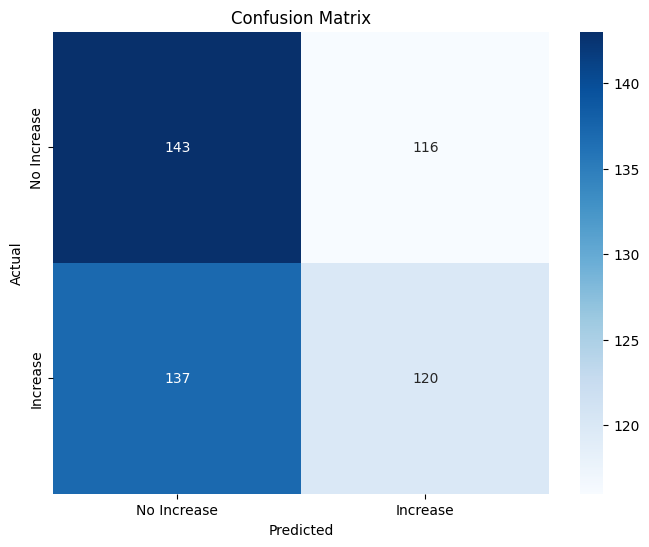

In [25]:


import matplotlib.pyplot as plt
import seaborn as sns
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Increase', 'Increase'], yticklabels=['No Increase', 'Increase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
